In [2]:
suppressPackageStartupMessages(library(VGAM))
suppressPackageStartupMessages(library(arrow))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(data.table))

In [2]:
vcf_file <- "/home/dmeyer/projects/bqtls/SecondRound_bQTLs/VCF_files/bgzipped_vcfs/monocyte_pool.vcf.gz.gz"
cell_lines <- system(paste("bcftools query -l", vcf_file), intern = T)

In [6]:
vcf_file <- "/home/dmeyer/projects/bqtls/SecondRound_bQTLs/VCF_files/bgzipped_vcfs/merged_ancestries_microglia.vcf.gz"
cell_lines <- system(paste("bcftools query -l", vcf_file), intern = T)

In [4]:
geno = fread(cmd = paste("bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%ID\t%AC\t%AN\t%AF[\t%GT]\n'", vcf_file), header = F, 
                  col.names = c("CHROM", "POS", "REF", "ALT", "ID", "AC", "AN", "AF", cell_lines))
geno_fix <- function (x) {
    switch(x,
       "0|0"=0,
       "1|0"=0.5,
       "0|1"=0.5,
       "1|1"=1, 
       "0/0"=0,
       "1/0"=0.5,
       "0/1"=0.5,
       "1/1"=1, 
           NA)
}
for (x in cell_lines) {
    geno[[x]] <- sapply(geno[[x]], geno_fix)
}

Warning message in fread(cmd = paste("bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%ID\t%AC\t%AN\t%AF[\t%GT]\n'", :
“Discarded single-line footer: <<chr1	106634403	A	G	chr>>”


In [292]:
write_feather(geno, "~/projects/bqtls/SecondRound_bQTLs/VCF_files/feathers/merged_ancestries_microglia.feather")

In [293]:
setDT(geno)

In [3]:
geno <- read_feather("~/projects/bqtls/SecondRound_bQTLs/VCF_files/feathers/monocyte_pool.feather", col_select = NULL, as_data_frame = TRUE, mmap = TRUE)
setDT(geno)

In [3]:
geno <- read_feather("~/projects/bqtls/SecondRound_bQTLs/VCF_files/feathers/merged_ancestries_microglia.feather", col_select = NULL, as_data_frame = TRUE, mmap = TRUE)
setDT(geno)

In [4]:
head(geno)

index,position,contig,variantID,refAllele,altAllele,GSA8_0_RAJBrain_NPBB306,GSA8_0_RAJBrain_NPBB307,GSA8_0_RAJBrain_NPBB310,GSA8_0_RAJBrain_NPBB314,GSA8_0_RAJBrain_NPBB318,GSA8_0_RAJBrain_NPBB319,GSA8_0_RAJBrain_NPBB312,GSA8_0_RAJBrain_NPBB334,GSA8_0_RAJBrain_NPBB324,GSA8_0_RAJBrain_NPBB305,GSA8_0_RAJBrain_NPBB333,GSA8_0_RAJBrain_NPBB308,GSA8_0_RAJBrain_NPBB316,GSA8_0_RAJBrain_NPBB331
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:11171:CCTTG:C,11171,chr1,chr1:11171:CCTTG:C,CCTTG,C,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,0,0,0
chr1:23197:TTAAAA:T,23197,chr1,chr1:23197:TTAAAA:T,TTAAAA,T,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,NA
chr1:23308:G:C,23308,chr1,chr1:23308:G:C,G,C,0,0,0,0,0,0,0,0,0,NA,NA,0,0,0
chr1:48824:T:C,48824,chr1,chr1:48824:T:C,T,C,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0
chr1:54490:G:A,54490,chr1,chr1:54490:G:A,G,A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0
chr1:60351:A:G,60351,chr1,chr1:60351:A:G,A,G,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0


In [10]:
geno <- mutate(geno, 
               AC = apply(geno[,..cell_lines], 1, function(x) { sum(x[!is.na(x)]) }), .after = "altAllele")%>%
        mutate(AF = AC / length(cell_lines), .after = "AC")%>%
        mutate(MAF = ifelse(AF > 0.5, 1-AF, AF), .after = "AC")

In [11]:
head(geno)

index,position,contig,variantID,refAllele,altAllele,AC,MAF,AF,GSA8_0_RAJBrain_NPBB306,⋯,GSA8_0_RAJBrain_NPBB318,GSA8_0_RAJBrain_NPBB319,GSA8_0_RAJBrain_NPBB312,GSA8_0_RAJBrain_NPBB334,GSA8_0_RAJBrain_NPBB324,GSA8_0_RAJBrain_NPBB305,GSA8_0_RAJBrain_NPBB333,GSA8_0_RAJBrain_NPBB308,GSA8_0_RAJBrain_NPBB316,GSA8_0_RAJBrain_NPBB331
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:11171:CCTTG:C,11171,chr1,chr1:11171:CCTTG:C,CCTTG,C,0,0,0,NA,⋯,NA,NA,NA,NA,NA,0,NA,0,0,0
chr1:23197:TTAAAA:T,23197,chr1,chr1:23197:TTAAAA:T,TTAAAA,T,0,0,0,NA,⋯,NA,NA,NA,NA,NA,NA,0,NA,NA,NA
chr1:23308:G:C,23308,chr1,chr1:23308:G:C,G,C,0,0,0,0,⋯,0,0,0,0,0,NA,NA,0,0,0
chr1:48824:T:C,48824,chr1,chr1:48824:T:C,T,C,0,0,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,0
chr1:54490:G:A,54490,chr1,chr1:54490:G:A,G,A,0,0,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,0
chr1:60351:A:G,60351,chr1,chr1:60351:A:G,A,G,0,0,0,NA,⋯,NA,NA,NA,NA,NA,NA,0,0,0,0


In [ ]:
geno_flipped <- mutate(geno, AC = length(cell_lines) - AC, AF = 1-AF, tmp = refAllele, REF=altAllele)%>%mutate(ALT = tmp)%>%select(-tmp)%>%
    mutate(ID = paste(contig, position, refAllele, altAllele, sep=":"))

In [230]:
obs_file <- "~/projects/bqtls/SecondRound_bQTLs/Monocytes/PU1_mono_allelic_out.txt"

In [12]:
obs_file <- "/home/dmeyer/projects/bqtls/SecondRound_bQTLs/Microglia_All_Ancestries/PU1_ALL_mic_allelic_out.txt"

In [13]:
obs <- fread(obs_file, sep = "\t", header = F, skip = 1) 
obs <- obs[,1:(ncol(obs)-1)]
colnames(obs) <- unlist(strsplit(readLines(obs_file, 1), "\t"))

In [14]:
nrow(obs[totalCount >= 100])

[1] 1044

In [15]:
if (!all(obs$variantID %in% geno$variantID)) {
    stop("Allele flipping in", obs_file)
}

In [16]:
if (!all(obs$variantID %in% c(geno$varinatID, geno_flipped$variantID))) {
    stop("EEK")
}

ERROR: Error in obs$variantID %in% c(geno$varinatID, geno_flipped$variantID): object 'geno_flipped' not found


## Do deconvolution

I believe that it works in the following way:
1. We learn representations of cell lines from CHIP seq variant abundances (learn mixing ratios that best estimate final allele counts)
2. We use this learned representation vector to estimate new AFs
3. We look for variants that are skewed in some unexpected way

In [18]:
total_thresh <- 30
maf_thresh <- 0.05
obs_sub <- obs[(totalCount >= total_thresh) & (totalCount != refCount) & (totalCount != altCount)]
geno_sub <- geno[(MAF >= maf_thresh)]
variants_keep <- intersect(obs_sub$variantID, geno_sub$variantID)
obs_sub <- obs_sub[match(variants_keep, variantID)]
geno_sub <- geno[match(variants_keep, variantID)]

In [19]:
X <- as.matrix(geno[match(variants_keep, variantID), ..cell_lines])
dim(X)

[1] 11740    14

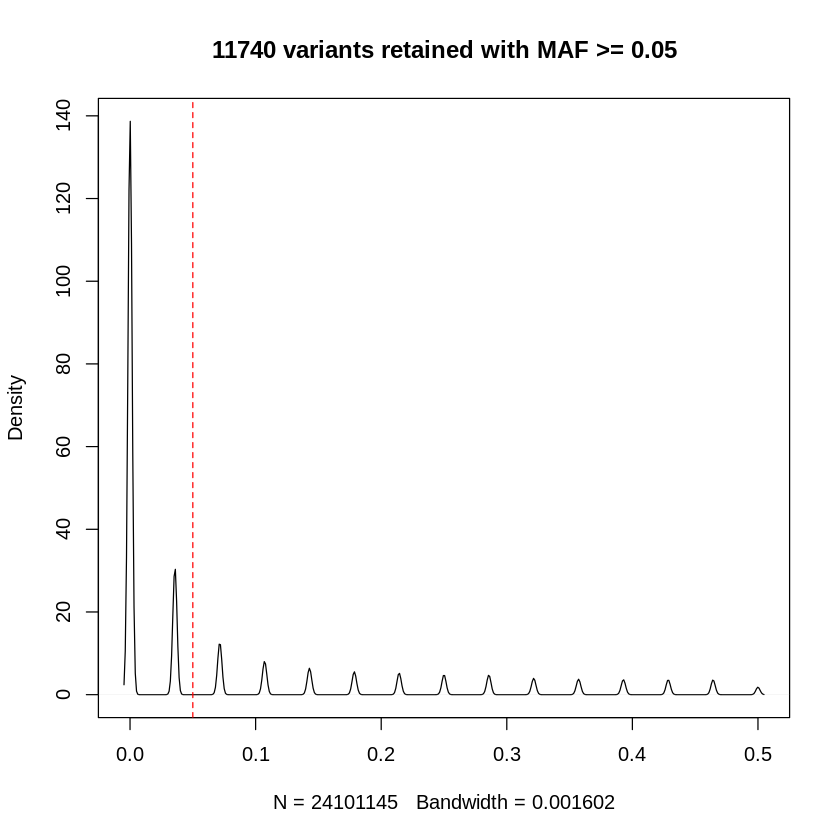

In [20]:
plot(density(geno$MAF), main = paste(nrow(X), "variants retained with MAF >= 0.05"))
abline(v=0.05, col='red', lty='dashed')

In [21]:
# observed allelic ratios
y <- with(obs_sub, altCount / totalCount)
length(y)

[1] 11740

In [22]:
library(ggplot2)

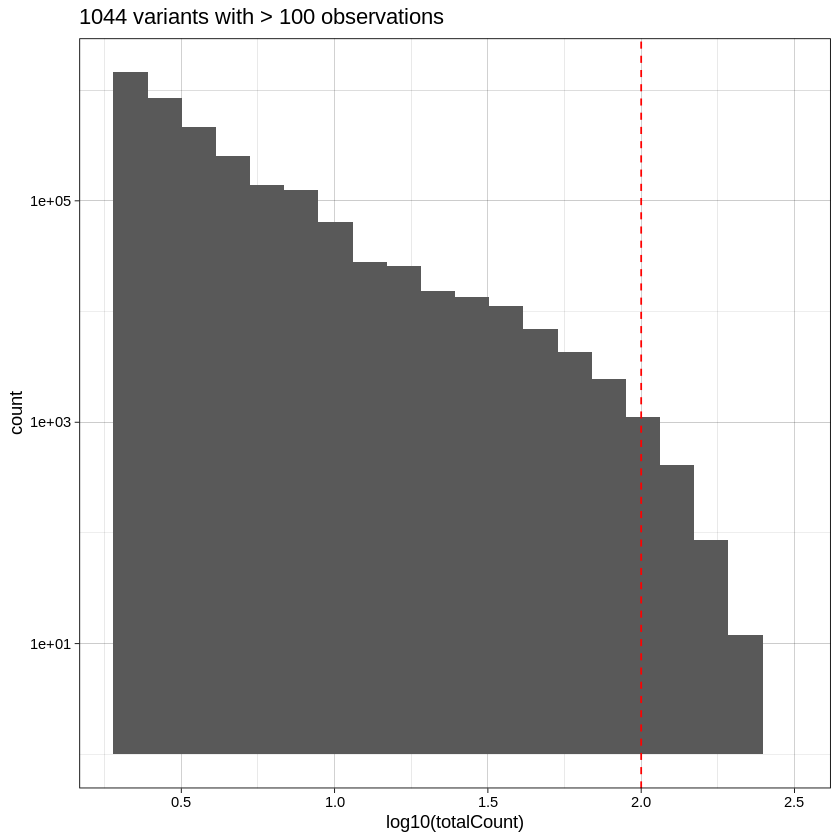

In [23]:
ggplot(obs, aes(x = log10(totalCount))) +  theme_linedraw()+
geom_histogram(bins = 20) +
scale_y_log10()+
geom_vline(xintercept = log10(100), col='red', lty='dashed')+
labs(title = nrow(obs[totalCount >= 100])%>%paste("variants with > 100 observations"))

In [24]:
stopifnot(all(!is.na(y)))
stopifnot(all(is.numeric(y)))

In [25]:
fit <- lm(y ~ 0+X)

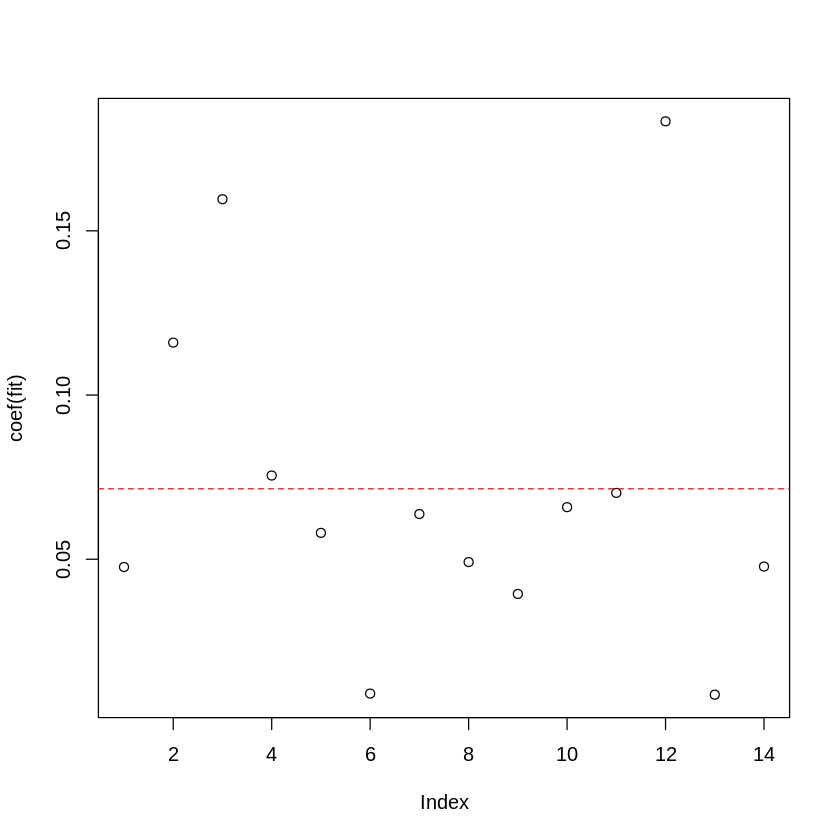

In [26]:
plot(coef(fit))
abline(h = 1/length(cell_lines), col = 'red', lty='dashed')

In [27]:
w <- coef(fit)
stopifnot(all(paste0('X', cell_lines) == names(w)))
names(w) <- cell_lines

In [28]:
afs_expected <- geno_sub$AF

In [29]:
# Multiply each row of X by w and sum to get predicted AFs
# so  X %*% x
mu = X  %*% w

In [35]:
min(mu,na.rm=T)
max(mu,na.rm=T)

[1] 0.008750588

[1] 0.9697679

In [36]:
mu

0.06155436
NA
0.89359446
0.35375909
0.20567676
0.79332147
0.45714534
0.50873710
0.50873710
NA
NA


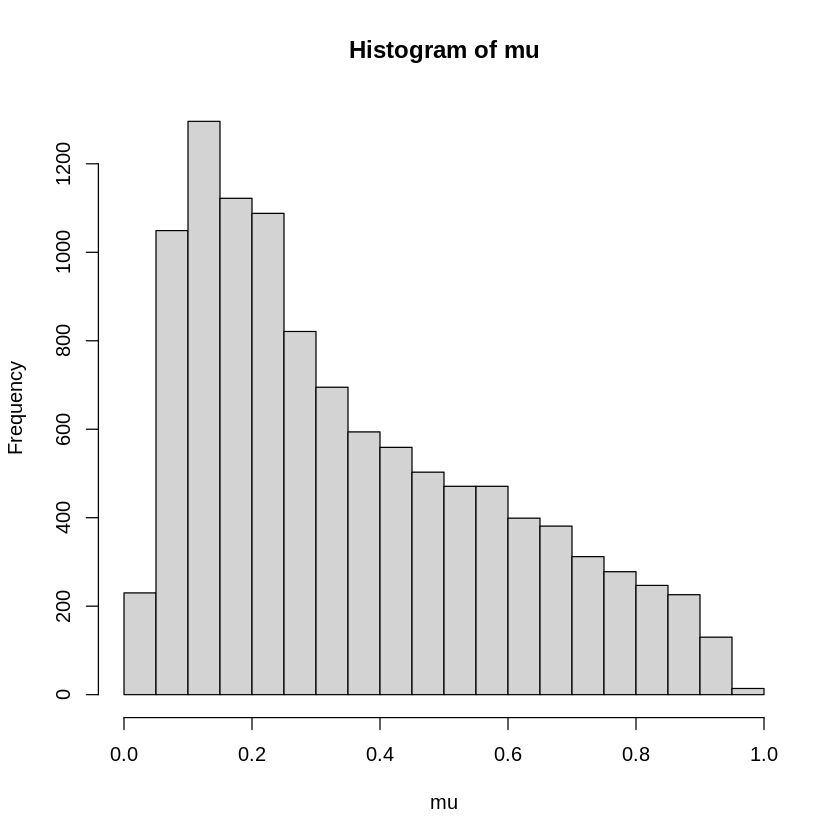

In [37]:
hist(mu)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 854 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 854 rows containing missing values (`geom_point()`).”


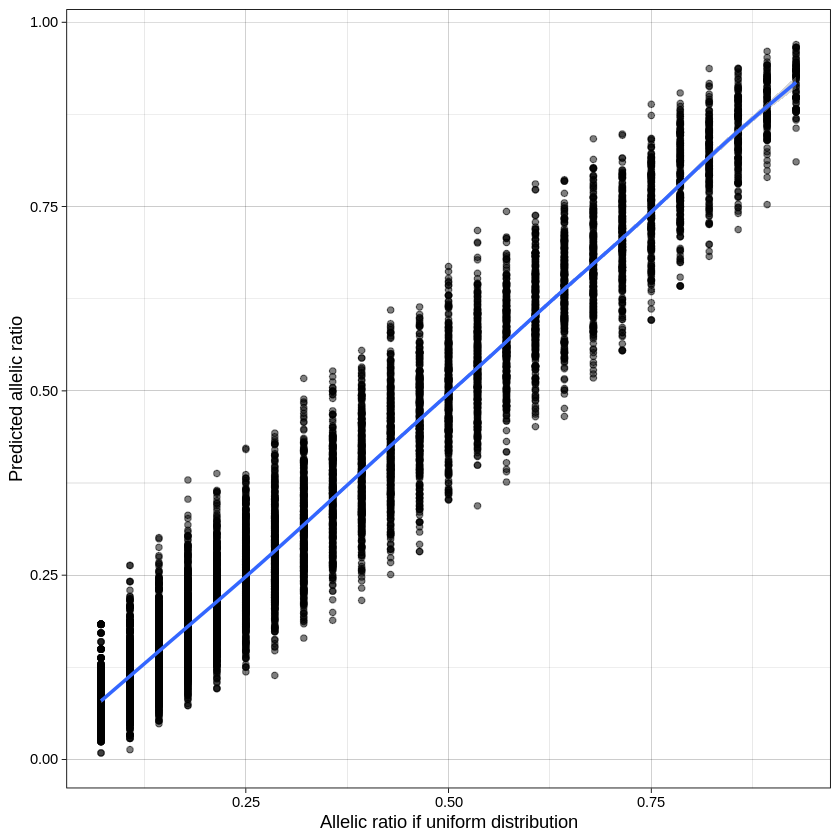

In [38]:
data.frame(mu, afs_expected)%>%
ggplot(aes(x = afs_expected, y = mu)) + 
geom_point(alpha = 0.5) +
theme_linedraw()+
geom_smooth()+
labs(x = "Allelic ratio if uniform distribution", y = "Predicted allelic ratio")

Warning message:
“Removed 854 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 854 rows containing missing values (`geom_point()`).”


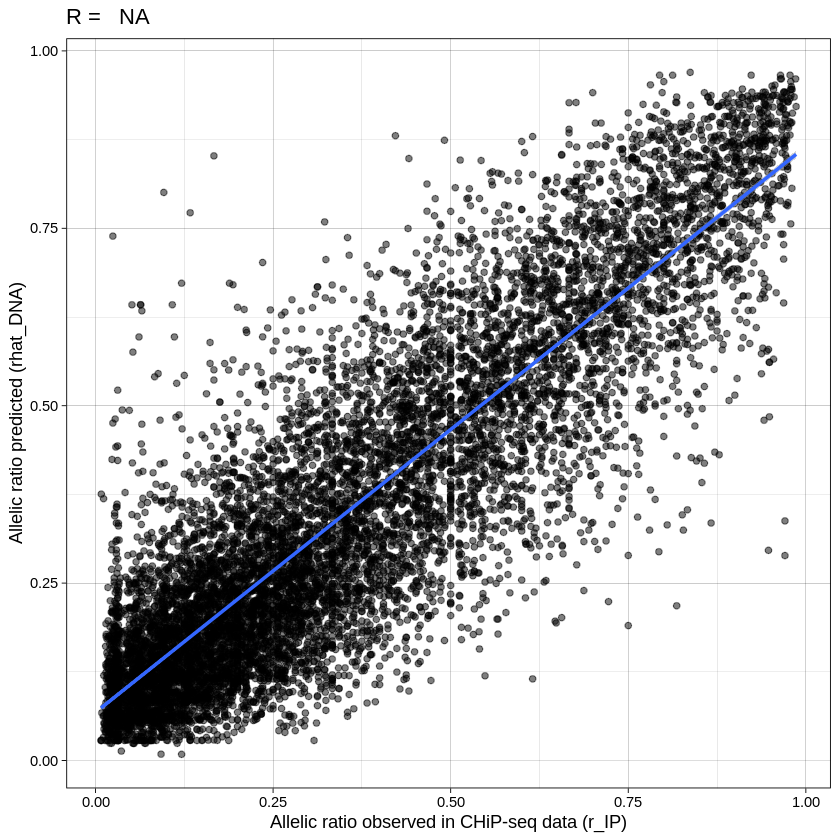

In [39]:
# Then we also want to plot predicted allelic ratio against ACTUAL allelic ratio
observed_allelic_ratio <- obs_sub$altCount / obs_sub$totalCount

ggplot(data.frame(observed_allelic_ratio, predicted_allelic_ratio = mu),
       aes(x = observed_allelic_ratio, y = mu)) +
geom_point(alpha = 0.5) +
geom_smooth(method=lm, formula = y ~ x, se = TRUE) +
theme_linedraw()+
labs(x = "Allelic ratio observed in CHiP-seq data (r_IP)", y = "Allelic ratio predicted (rhat_DNA)", title = paste0("R = ", formatC(cor(observed_allelic_ratio, mu)^2, digits = 3)))

## Then run beta model

## Fit Betabinomial distribution to $y_i | n_i$

Prior: $$r_{\text{IP}} \vert \hat{r}_D \sim \text{Beta}(\mu = \hat{r}_D, c_{\text{IP}})$$

Estimate $$y_i \vert n_i \sim \text{BB}(\mu = \hat{r}_D, c_{\text{IP}}')$$

In [40]:
fit <- vglm(cbind(altCount, refCount) ~ identitylink(offset(mu)), betabinomial(lmu = identitylink, lrho = identitylink), obs_sub, crit = "coef")
# Uses the mu to predict a 2-dimensional vector of ref and alt
# Automatically conditions on alt_count + ref_count
# rho = 1 / (1 + alpha + beta)
# what david wants conc = (1-rho)/rho
# rho is not actually concentration (called the correlation parameter)

In [41]:
# rho if 0 is normal distribution

In [42]:
coef(fit, matrix = TRUE)

,mu,rho
(Intercept),0.02612299,0.05785618
identitylink(offset(mu)),0.94775678,0.00000000


In [43]:
rho <- coef(fit, matrix = TRUE)[1,2]
conc <- (1-rho)/rho

In [44]:
mu <- as.double(mu)

In [45]:
conc

[1] 16.28424

Notes from meeting with David 10/2/23
* if the concentration is like 300 then it's almost binomial, not beta-binomial
* 10-50 common for seq dataobs_sub
* low 10s is surprisingly noisy

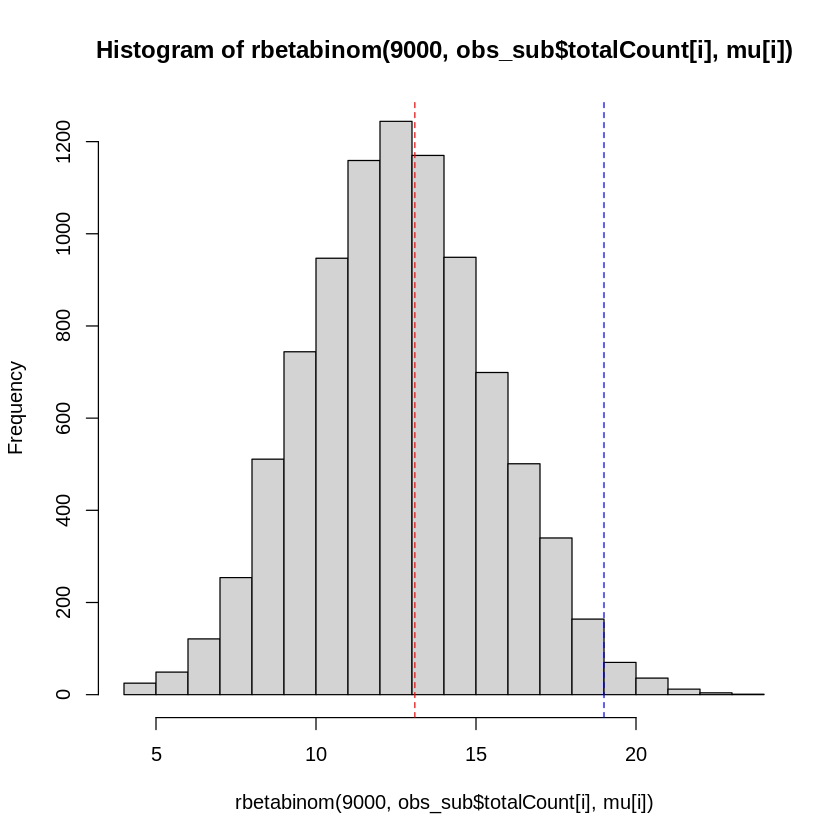

In [46]:
i = 4
crit1 <- obs_sub$totalCount[i]*mu[i]
crit2 <- obs_sub$altCount[i]
hist(rbetabinom(9000, obs_sub$totalCount[i], mu[i]))
abline(v = crit1, col = 'red', lty='dashed')
abline(v = crit2, col = 'blue', lty='dashed')

### Calculate p-value correctly depending on whether or not altCount > totalCount*$\mu$

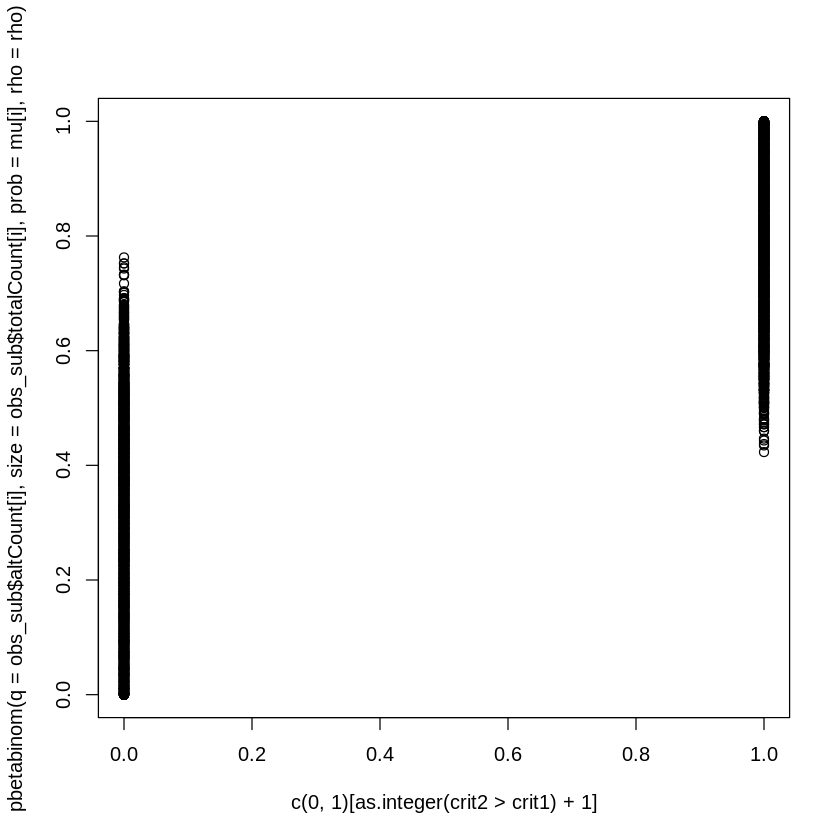

In [47]:
i = 1:nrow(obs_sub)
crit1 <- obs_sub$totalCount[i]*mu[i]
crit2 <- obs_sub$altCount[i]

plot(c(0,1)[as.integer(crit2 > crit1)+1],
     pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho))

Warning message:
“Removed 854 rows containing non-finite values (`stat_ydensity()`).”


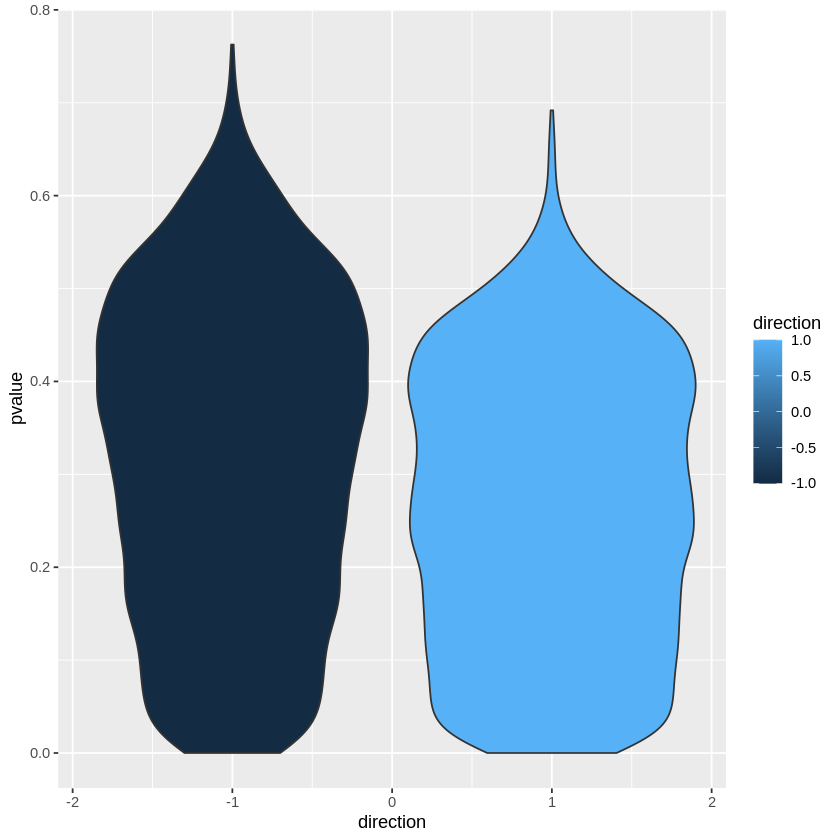

In [48]:
idx <- crit2 > crit1
data.frame(direction = c(-1L, 1L)[as.integer(idx)+1],
     pvalue = ifelse(idx, 
            1-pbetabinom(q = obs_sub$altCount[i]-1, size = obs_sub$totalCount[i], prob = mu[i], rho = rho),
            pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
           ))%>%
ggplot(aes( x= direction, y = pvalue, group = direction, fill = direction))+ geom_violin()

Warning message:
“Removed 854 rows containing non-finite values (`stat_ydensity()`).”


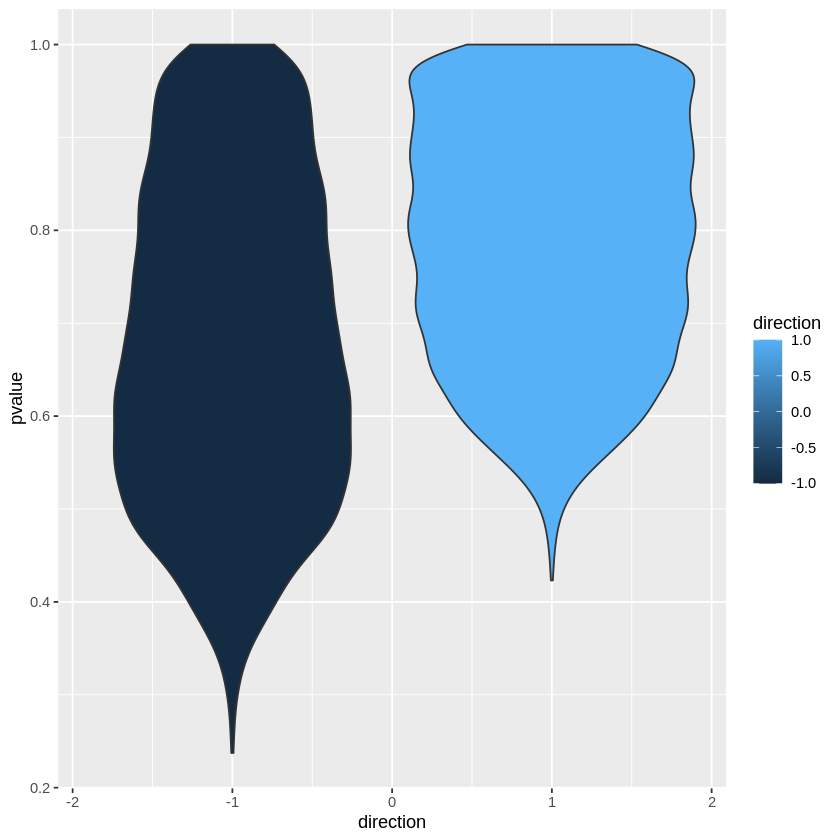

In [49]:
idx <- crit2 > crit1
data.frame(direction = c(-1L, 1L)[as.integer(idx)+1],
     pvalue = ifelse(idx, 
            pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho),
            1-pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
           ))%>%
ggplot(aes( x= direction, y = pvalue, group = direction, fill = direction))+ geom_violin()

Warning message:
“Removed 854 rows containing non-finite values (`stat_ydensity()`).”


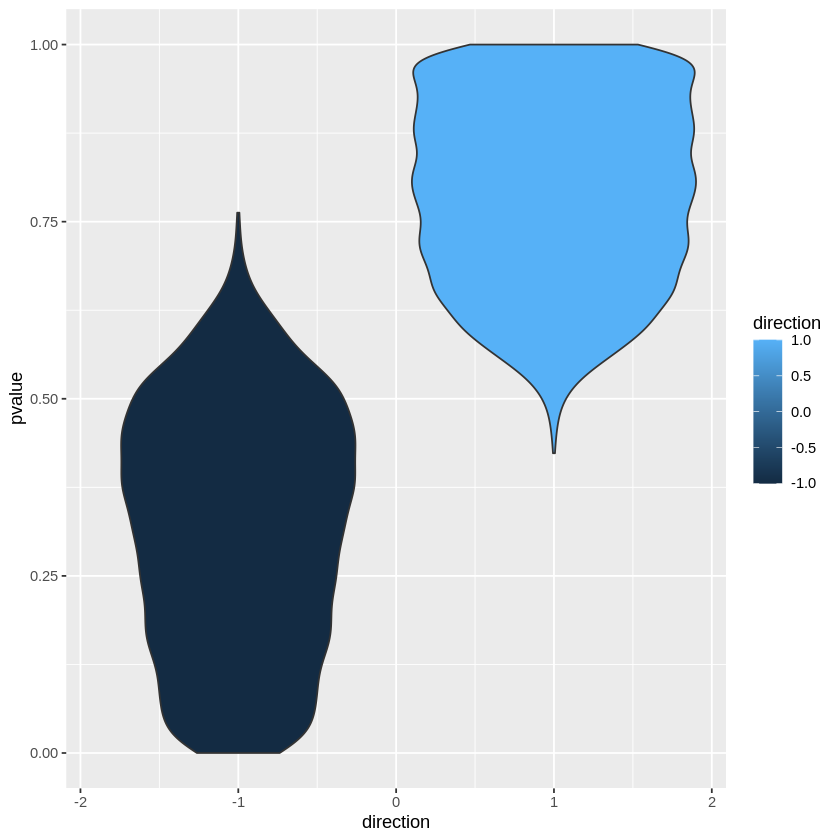

In [50]:
idx <- crit2 > crit1
data.frame(direction = c(-1L, 1L)[as.integer(idx)+1],
     pvalue = ifelse(idx, 
            pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho),
            pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
           ))%>%
ggplot(aes( x= direction, y = pvalue, group = direction, fill = direction))+ geom_violin()

### Calculate p-values correctly

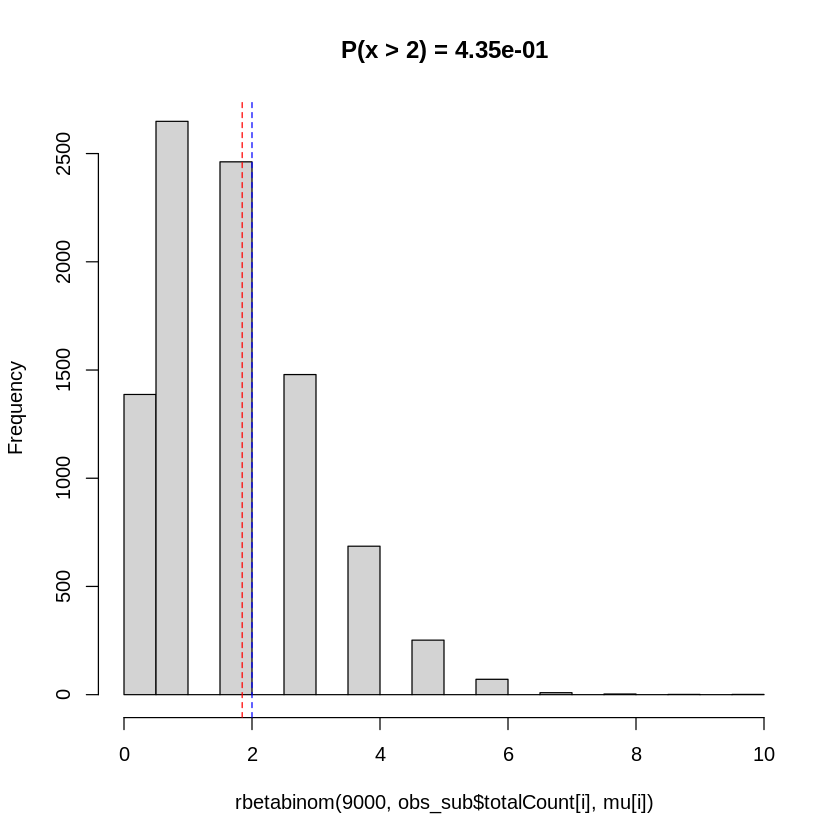

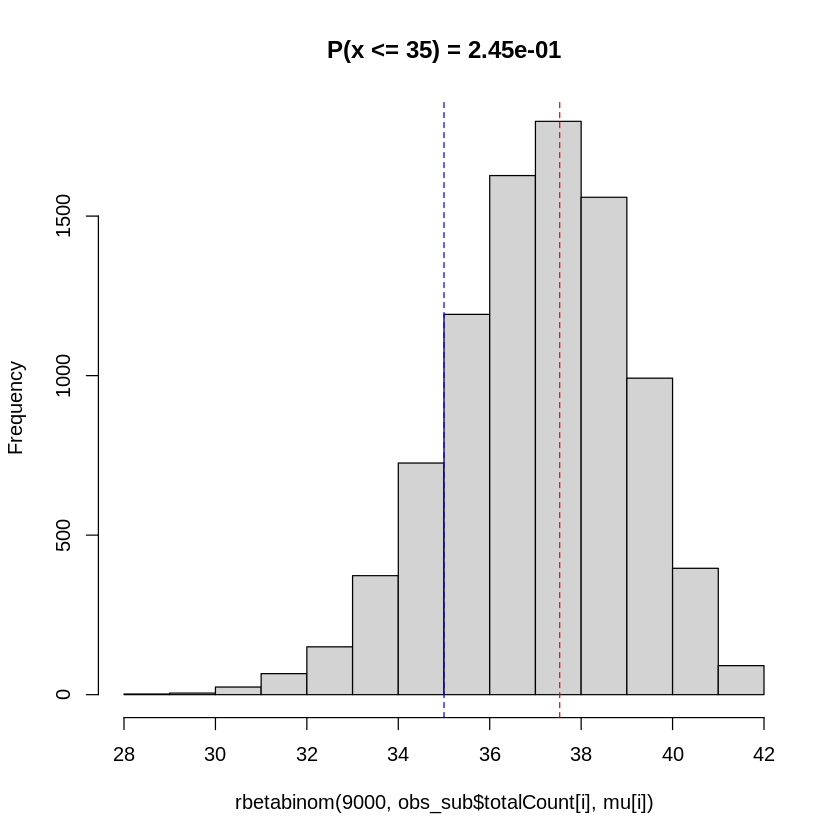

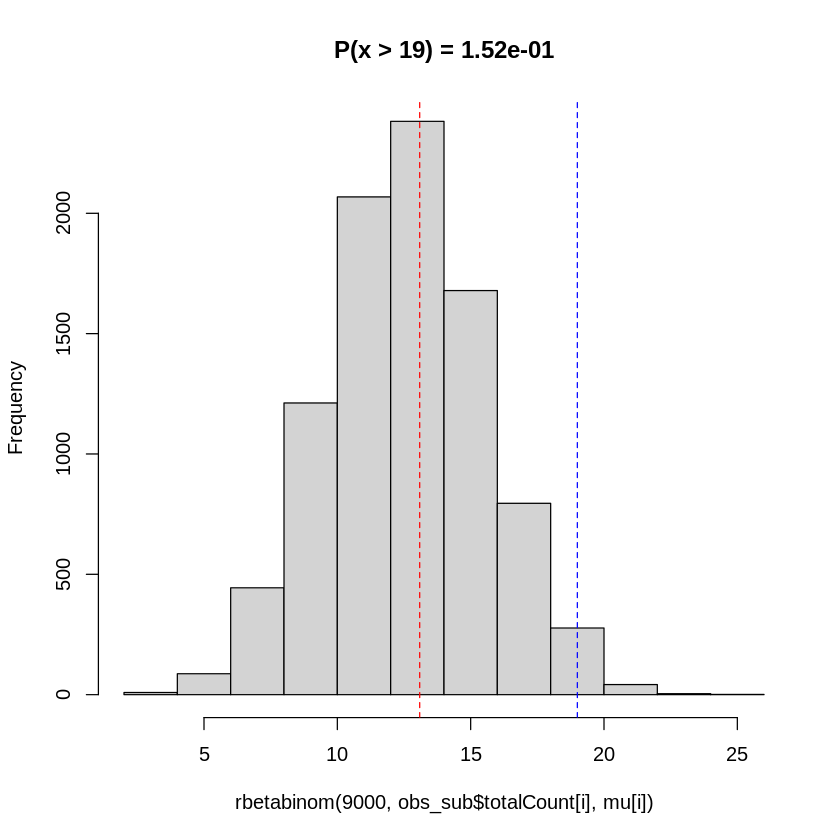

In [54]:
for (i in 1:4) {
    crit1 <- obs_sub$totalCount[i]*mu[i]
    crit2 <- obs_sub$altCount[i]
    if (is.na(crit1) | is.na(crit2)) {
        next()
    }
    if (crit2 > crit1) {
        pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
        pval =1-pbetabinom(q = obs_sub$altCount[i]-1, size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
        .title = paste0("P(x > ", round(crit2,2), ") = ", format(pval, scientific = TRUE, digits = 3))
    } else {
        pval = pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
        .title = paste0("P(x <= ", round(crit2,2), ") = ", format(pval, scientific = TRUE, digits = 3))
    }
    hist(rbetabinom(9000, obs_sub$totalCount[i], mu[i]), main = .title)
    abline(v = crit1, col = 'red', lty='dashed')
    abline(v = crit2, col = 'blue', lty='dashed')
}

In [55]:
pvals <- sapply(1:length(mu), function(i) {
    crit1 <- obs_sub$totalCount[i]*mu[i]
    crit2 <- obs_sub$altCount[i]
    if (is.na(crit1) | is.na(crit2)) {
       return(NA)
    }
    if (crit2 > crit1) {
        pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
        pval =1-pbetabinom(q = obs_sub$altCount[i]-1, size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
    } else {
        pval = pbetabinom(q = obs_sub$altCount[i], size = obs_sub$totalCount[i], prob = mu[i], rho = rho)
    }
    return(pval)
})

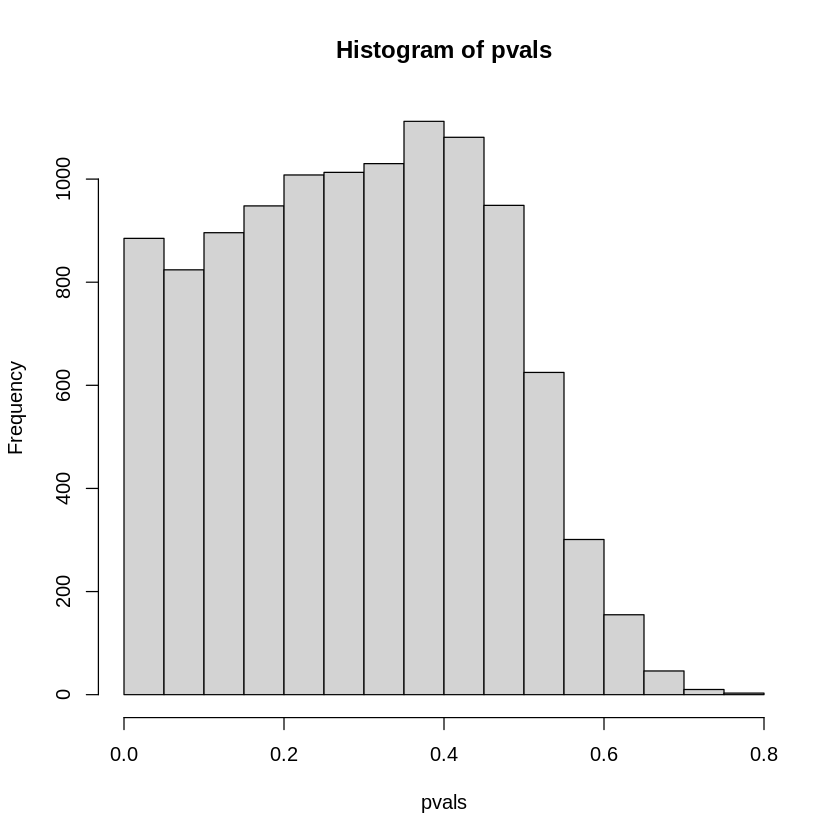

In [56]:
hist(pvals)

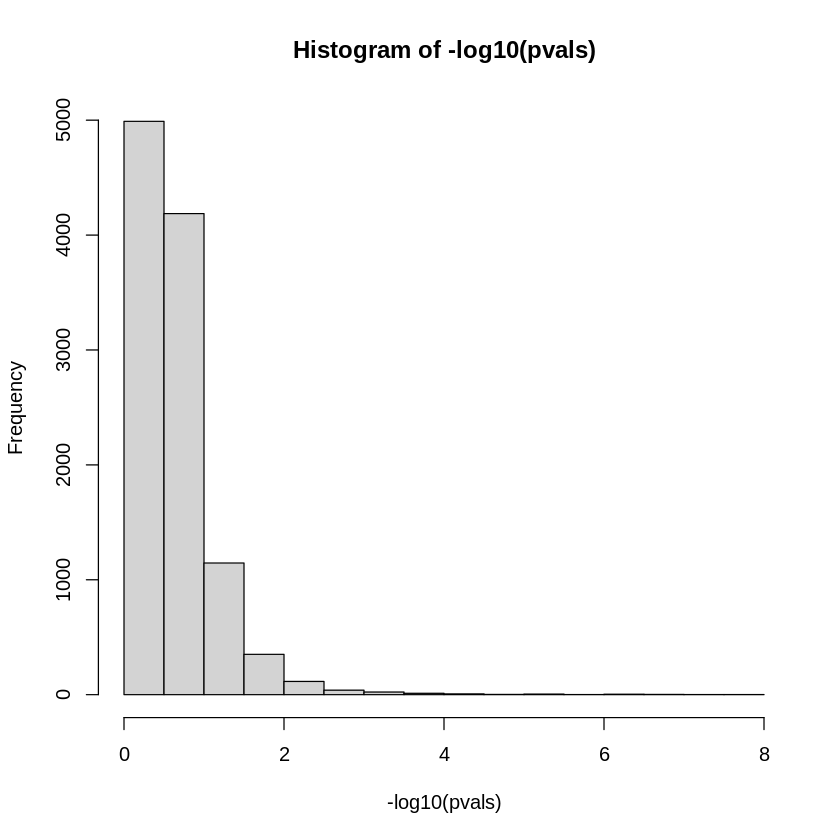

In [57]:
hist(-log10(pvals))

In [58]:
library(readr)

In [63]:
results <- mutate(obs_sub,p_value = pvals,
    direction = sapply(1:length(mu), function(i) {
        crit1 <- obs_sub$totalCount[i]*mu[i]
        crit2 <- obs_sub$altCount[i]
        if (is.na(crit1) | is.na(crit2)) {
           return(NA)
        }
        if (crit2 > crit1) {
            return("Positive")
        } else { 
            return("Negative")
        }
    }))%>%
arrange(p_value)
write_tsv(results, "~/projects/bqtls/SecondRound_bQTLs/asb/Microglia_PU1.txt")

In [65]:
fread("~/projects/bqtls/SecondRound_bQTLs/asb/Microglia_PU1.txt")

contig,position,variantID,refAllele,altAllele,refCount,altCount,totalCount,lowMAPQDepth,lowBaseQDepth,rawDepth,otherBases,p_value,direction
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
chr17,29107428,chr17:29107428:A:T,A,T,40,1,41,0,0,41,0,1.288777e-08,Negative
chr17,29107375,chr17:29107375:T:C,T,C,47,5,52,0,0,52,0,4.087567e-08,Negative
chr6,41228296,chr6:41228296:T:C,T,C,74,4,78,0,0,78,0,1.284084e-07,Negative
chr7,37220788,chr7:37220788:C:T,C,T,1,33,34,0,0,34,0,2.025800e-07,Positive
chr5,159452861,chr5:159452861:C:G,C,G,35,7,42,0,0,42,0,4.423355e-07,Negative
chr4,38191858,chr4:38191858:A:C,A,C,2,36,38,0,0,38,0,5.947138e-07,Positive
chr6,41228302,chr6:41228302:T:C,T,C,59,4,63,0,0,63,0,8.516620e-07,Negative
chr6,41228303,chr6:41228303:C:T,C,T,59,4,63,0,0,63,0,8.516620e-07,Negative
chr2,29861183,chr2:29861183:G:A,G,A,1,33,34,0,0,35,1,1.011771e-06,Positive


In [83]:
library(stringr)

In [86]:
ld_table <- 
    fread("https://ldlink.nih.gov/LDlinkRestWeb/tmp/proxy12270.txt")%>%
    mutate(variantID = paste0(Coord, ':', str_extract(Alleles, "[AGCT]+"), ":", str_extract(Alleles, "[AGCT]+(?=.$)")))

In [88]:
results%>%inner_join(ld_table)%>%t

Joining with `by = join_by(variantID)`


contig,chr5,chr5
position,180284184,180177487
variantID,chr5:180284184:C:T,chr5:180177487:C:G
refAllele,C,C
altAllele,T,G
refCount,31,14
altCount,5,24
totalCount,36,38
lowMAPQDepth,0,0
lowBaseQDepth,0,0
rawDepth,36,38


In [91]:
results <- fread("~/projects/bqtls/SecondRound_bQTLs/asb/Monocytes_PU1.txt")

In [93]:
ld_table <- 
    fread("https://ldlink.nih.gov/LDlinkRestWeb/tmp/proxy12270.txt")%>%
    mutate(variantID = paste0(Coord, ':', str_extract(Alleles, "[AGCT]+"), ":", str_extract(Alleles, "[AGCT]+(?=.$)")))

In [94]:
results%>%inner_join(ld_table)%>%t

Joining with `by = join_by(variantID)`


contig
position
variantID
refAllele
altAllele
refCount
altCount
totalCount
lowMAPQDepth
lowBaseQDepth
rawDepth


# TODO: Calculate p-values for everything

In [2]:
rmarkdown::convert_ipynb("ariana_round2_VGAM.ipynb", output = xfun::with_ext("ariana_round2_VGAM.ipynb", "Rmd"))